In [10]:
# Import required libraries
import numpy as np
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Database connection details
db_host = 'localhost'
db_port = 3306
db_name = 'stock_db'
db_user = 'stock_user'
db_password = 'calculus'

In [52]:
# Function to fetch data from MySQL database
def fetch_data_from_db():
    """
    Fetches data from the MySQL database.

    Returns:
        data (pd.DataFrame): DataFrame containing the fetched data.
    """
    try:
        conn = mysql.connector.connect(host=db_host,
                                       user=db_user,
                                       password=db_password,
                                       database=db_name,
                                       auth_plugin='mysql_native_password')
        print("Connection successful")
    except Exception as e:
        print(e)
        return None

    if conn:
        try:
            engine = create_engine(f"mysql+mysqlconnector://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}", connect_args={"auth_plugin": "mysql_native_password"}, echo=True)
            query = "SELECT * FROM stock"
            data = pd.read_sql(query, con=engine)
            print("Data fetched successfully")
            return data
        except Exception as e:
            print(f"Error: {e}")
            return None
        finally:
            conn.close()
            engine.dispose()

In [53]:
# Load data
data = fetch_data_from_db()
if data is not None:
    print("Data fetched successfully")
else:
    print("Failed to fetch data")

Connection successful
2024-06-18 19:33:31,962 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-06-18 19:33:31,963 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-06-18 19:33:31,965 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-06-18 19:33:31,966 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-06-18 19:33:31,966 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-06-18 19:33:31,966 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-06-18 19:33:31,968 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-06-18 19:33:31,968 INFO sqlalchemy.engine.Engine DESCRIBE `stock_db`.`SELECT * FROM stock`
2024-06-18 19:33:31,968 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-06-18 19:33:31,990 INFO sqlalchemy.engine.Engine SELECT * FROM stock
2024-06-18 19:33:31,990 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-06-18 19:33:32,100 INFO sqlalchemy.engine.Engine ROLLBACK
Data fetched successfully
Data fetched successfully


In [57]:
# Check the details of the data
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34499 entries, 0 to 34498
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       34499 non-null  object 
 1   Open       34499 non-null  float64
 2   High       34499 non-null  float64
 3   Low        34499 non-null  float64
 4   Close      34499 non-null  float64
 5   Adj Close  34499 non-null  float64
 6   Volume     34499 non-null  int64  
 7   Stock      34499 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 2.1+ MB


None

**Observation:**

* The data type of `Date` column has been changed from "datetime64[ns]" to "object".

In [58]:
display(data.head())

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2010-01-04,7.62250,7.66071,7.58500,7.64321,6.47074,493729600,AAPL
1,2010-01-05,7.66429,7.69964,7.61607,7.65643,6.48193,601904800,AAPL
2,2010-01-06,7.65643,7.68679,7.52679,7.53464,6.37882,552160000,AAPL
3,2010-01-07,7.56250,7.57143,7.46607,7.52071,6.36703,477131200,AAPL
4,2010-01-08,7.51071,7.57143,7.46643,7.57071,6.40936,447610800,AAPL


In [56]:
display(data.describe())

,Open,High,Low,Close,Adj Close,Volume
count,34499.000000,34499.000000,34499.000000,34499.000000,34499.000000,3.449900e+04
mean,91.902631,93.064384,90.716992,91.921633,89.448525,1.120512e+08
std,102.357538,103.779269,100.883930,102.356829,102.394971,1.952454e+08
min,0.218000,0.226250,0.216250,0.222000,0.203624,1.144000e+06
25%,19.231250,19.477750,18.980750,19.235000,18.268300,1.683060e+07
50%,52.160000,52.647500,51.600000,52.148500,47.440100,3.933180e+07
75%,135.005000,136.595000,133.615000,135.118500,131.692000,1.030308e+08
max,692.350000,700.990000,686.090000,691.690000,691.690000,3.692928e+09


In [62]:
# Identify missing values
def check_missing_values(df):
    """
    Identifies missing values in the DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to check for missing values.

    Returns:
        pd.Series: A series containing the count of missing values in each column.
    """
    missing_values = df.isnull().sum()
    print("Missing values in each column:\n", missing_values)

In [63]:
# calling check_missing_values()
check_missing_values(data)

Missing values in each column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Stock        0
dtype: int64


In [64]:
# Identify duplicate values
def check_duplicate_values(df):
    """
    Identifies duplicate rows in the DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to check for duplicate values.

    Returns:
        int: The number of duplicate rows.
    """
    duplicate_count = df.duplicated().sum()
    print("Number of duplicate rows:", duplicate_count)

In [65]:
# calling check_duplicate_values()
check_duplicate_values(data)

Number of duplicate rows: 0


In [70]:
# Visualize outliers
def visualize_outliers(df):
    """
    Visualizes outliers in the DataFrame using box plots.

    Args:
        df (pd.DataFrame): The DataFrame to visualize.
    """
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
    sns.boxplot(data=df, x='Open', ax=axes[0, 0])
    sns.boxplot(data=df, x='High', ax=axes[0, 1])
    sns.boxplot(data=df, x='Low', ax=axes[1, 0])
    sns.boxplot(data=df, x='Adj Close', ax=axes[1, 1])
    sns.boxplot(data=df, x='Volume', ax=axes[2, 0])
    plt.tight_layout()
    plt.show()

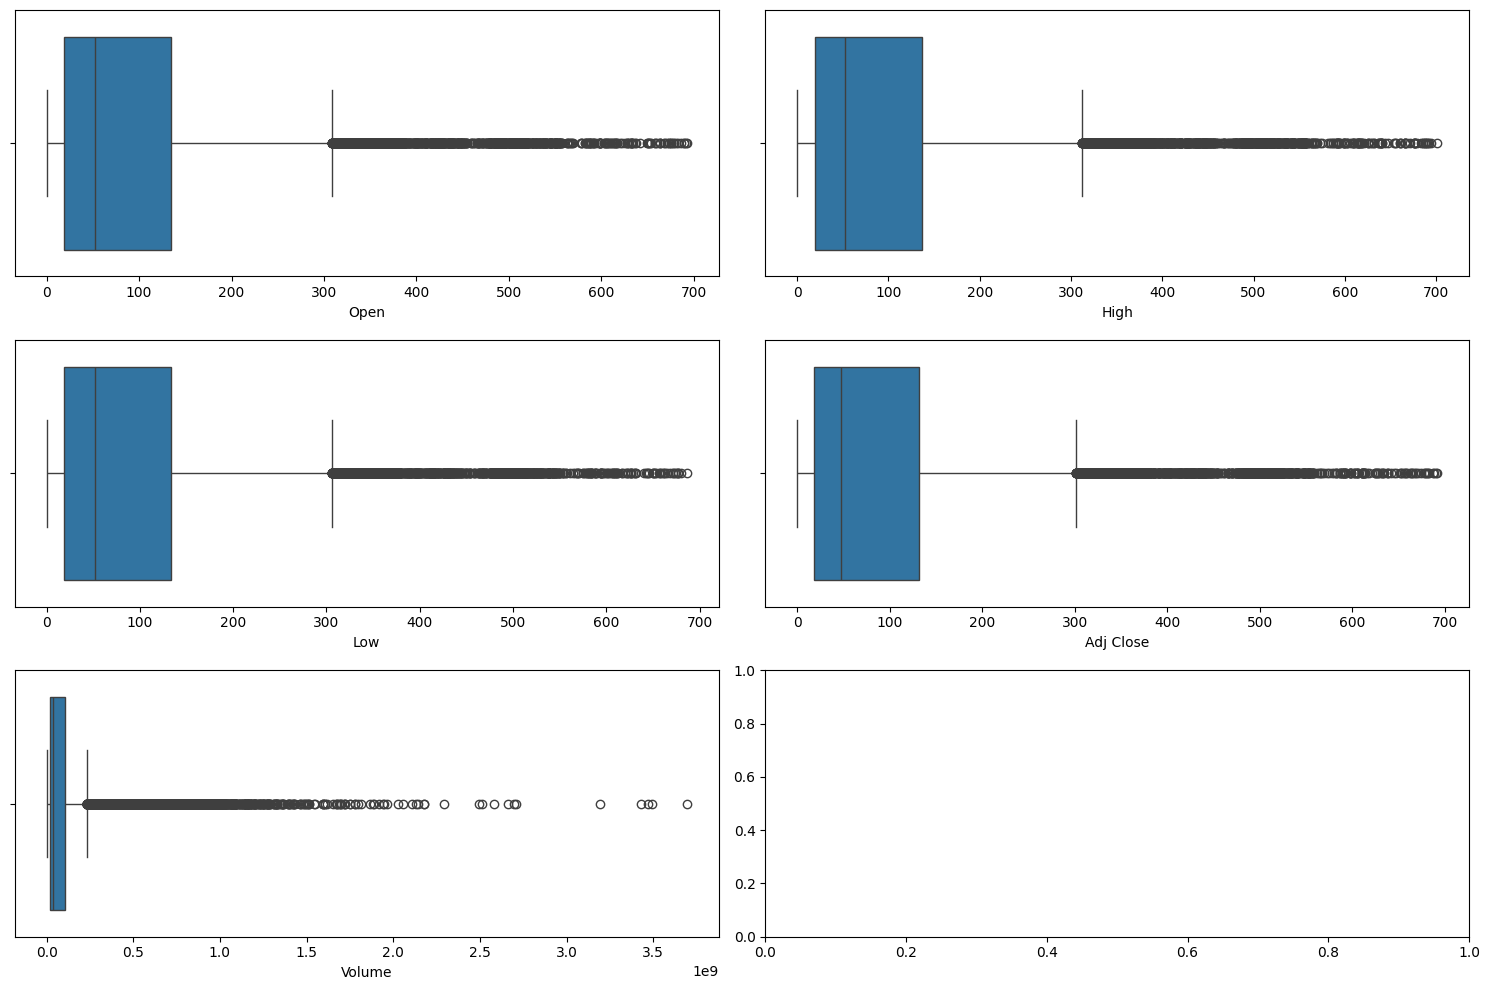

In [71]:
# calling visualize_outliers()
visualize_outliers(data)

**Observations:**

1. Open, High, Low, Adj Close:
    * These columns have a large number of data points identified as outliers. This is evident from the many data points that fall outside the whiskers of the box plots.
    * The majority of the data points for these columns are concentrated below 200, with a median value that appears to be below 100. This indicates that while there are some very high values (outliers), most stock prices are relatively low.

2. Volume:
    * The 'Volume' column also has many outliers. Most data points fall below approximately 0.5 billion (5e8), but there are some extreme outliers that go up to approximately 3.5 billion.
    * The data is highly skewed with a significant number of outliers on the higher end, indicating that there are some days with extremely high trading volumes compared to the majority.

3. General Trend:
    * Across all columns, there is a consistent pattern of many outliers. This suggests that while most stock prices and volumes are within a certain range, there are occasional extreme values that deviate significantly from the norm.
    * The presence of many outliers can significantly affect the performance of certain models and may necessitate specific handling techniques like robust scaling, capping, or even feature engineering to mitigate their impact.

**Key Considerations for Data Preprocessing:**

* **Handling Outliers:** The large number of outliers, particularly in the 'Volume' column, indicates that it might be beneficial to explore robust methods for dealing with these outliers, such as log transformations, capping, or using models that are less sensitive to outliers.
* **Feature Engineering:** Given the high variance and presence of outliers, creating additional features that capture the volatility or trends (e.g., moving averages, rolling statistics) might help improve model performance.
* **Model Selection:** Models that are robust to outliers, such as tree-based methods (Random Forest, Gradient Boosting), might perform better compared to linear models which can be heavily influenced by these extreme values.

In [72]:
def check_inconsistent_data(df):
    """
    Identifies inconsistent data in the DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to check for inconsistent data.

    Returns:
        pd.DataFrame: A DataFrame containing the inconsistent data.
    """
    inconsistent_data = df[(df['Open'] < 0) | (df['Close'] < 0) | (df['High'] < 0) | (df['Low'] < 0) | (df['Volume'] < 0)]
    print("Inconsistent data:\n", inconsistent_data)
    return inconsistent_data

In [74]:
# calling check_inconsistent_data()
inconsistent_data = check_inconsistent_data(data)
display(inconsistent_data)

Inconsistent data:
 Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Stock]
Index: []


,Date,Open,High,Low,Close,Adj Close,Volume,Stock
